# Analysis of Expert Consensus Rankings
An anlysis of how an estimation of ADP (ECR) is related to fantasy points between positions. The analysis is based on simulating a single team (under the assumed constraints of a snake draft) to discover how ADP of each individual position is related to other positions and their fantasy output.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set working directory
import os
current_dir = os.getcwd()
os.chdir(current_dir.replace('\code', '\data'))

In [12]:
# Load data
df = pd.read_csv('total_ecr_stats.csv')
df = df[df['RK'] > 0]
df = df[df['FPTS'] > 0]
df.head()

RK  TIERS          PLAYER POS  BEST  WORST  AVG  STD_DEV ECR_VS_ADP  \
0  1.0    1.0    Arian Foster  RB   1.0    4.0  1.6      0.8          0   
1  2.0    1.0        Ray Rice  RB   1.0    5.0  1.9      0.9          0   
2  3.0    1.0    LeSean McCoy  RB   2.0    4.0  3.0      0.6          0   
3  4.0    1.0  Calvin Johnson  WR   3.0    7.0  4.4      1.1         +1   
4  5.0    2.0   Aaron Rodgers  QB   4.0   12.0  6.1      1.9         -1   

   POSRK   FPTS  FPTS/G    Year  
0    1.0  302.1    18.9  2012.0  
1    2.0  283.1    17.7  2012.0  
2    3.0  199.3    16.6  2012.0  
3    1.0  342.4    21.4  2012.0  
4    1.0  344.5    21.5  2012.0

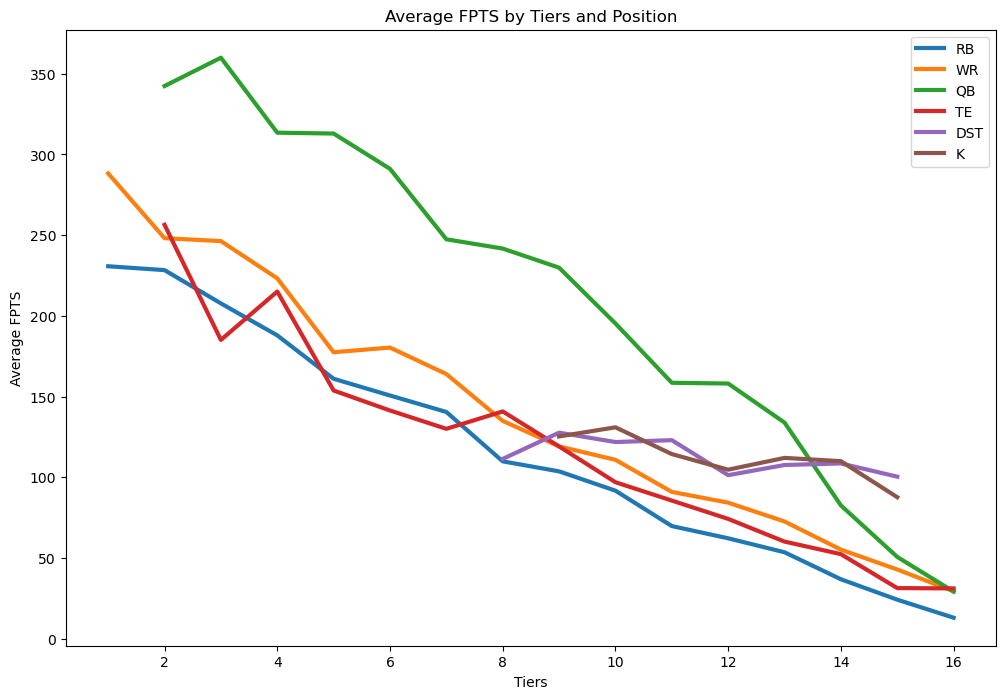

In [13]:
# Group by Tiers and Position to calculate average FPTS
df_grouped = df.groupby(['TIERS', 'POS']).agg({'FPTS': 'mean'}).reset_index()

# Plot average FPTS by Tiers and Position
fig, ax = plt.subplots(figsize=(12, 8))
for pos in df_grouped['POS'].unique():
    df_pos = df_grouped[df_grouped['POS'] == pos]
    ax.plot(df_pos['TIERS'], df_pos['FPTS'], label=pos, linewidth=3)
ax.set_xlabel('Tiers')
ax.set_ylabel('Average FPTS')
ax.set_title('Average FPTS by Tiers and Position')
ax.legend()
plt.show()

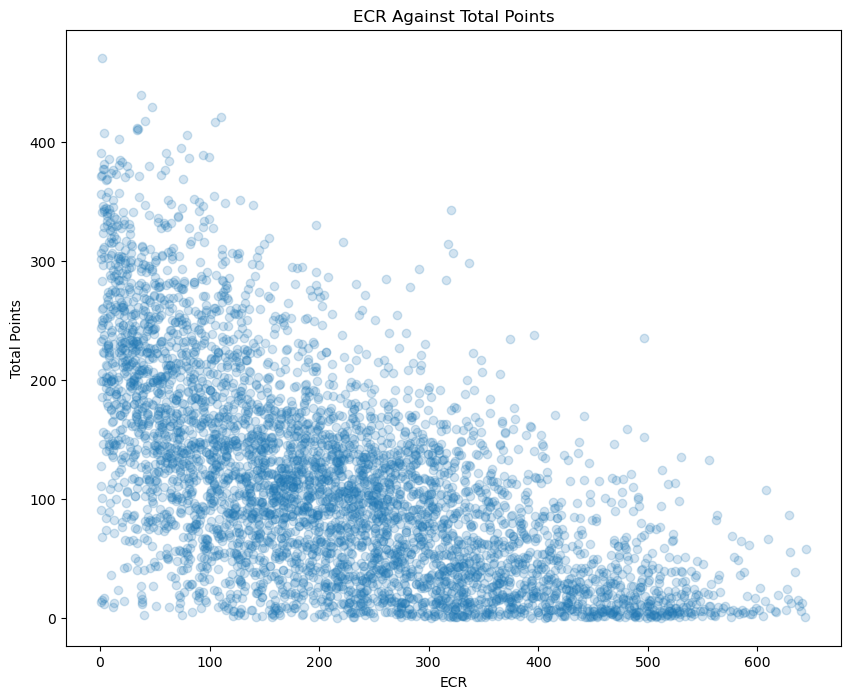

In [14]:
# Scatterplot 'RK' vs 'FPTS'
plt.figure(figsize=(10,8))
plt.scatter(df['RK'], df['FPTS'], alpha=0.20)
plt.title("ECR Against Total Points")
plt.ylabel("Total Points")
plt.xlabel("ECR")
plt.show()

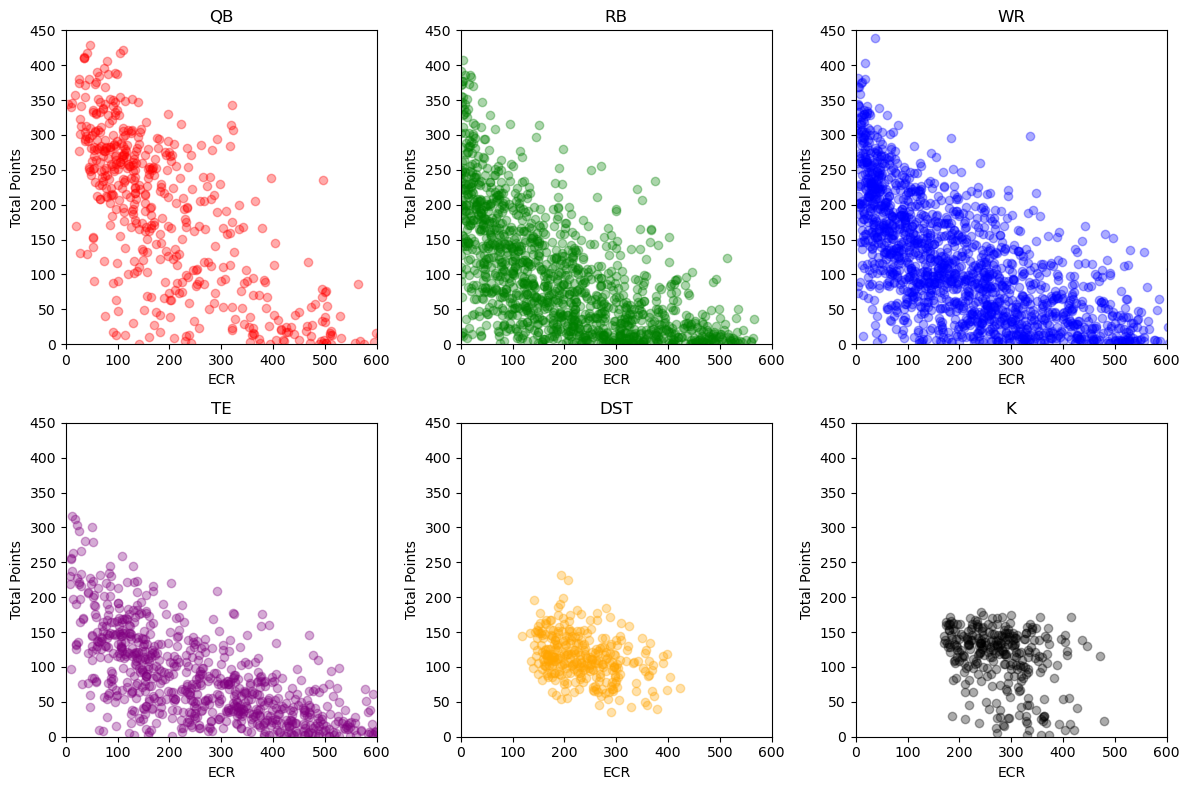

In [15]:
def plot_position(df, pos, subplot_num, color):
    data = df[df['POS'] == pos]
    plt.subplot(2, 3, subplot_num)
    plt.scatter(data['RK'], data['FPTS'], alpha=0.33, color=color)
    plt.title(pos)
    plt.ylabel("Total Points")
    plt.xlabel("ECR")
    plt.ylim(0, 450)
    plt.xlim(0, 600)

plt.figure(figsize=(12,8))


positions = ['QB', 'RB', 'WR', 'TE', 'DST', 'K']
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']
for i, (pos, color) in enumerate(zip(positions, colors), 1):
    plot_position(df, pos, i, color)

plt.tight_layout()
plt.show()

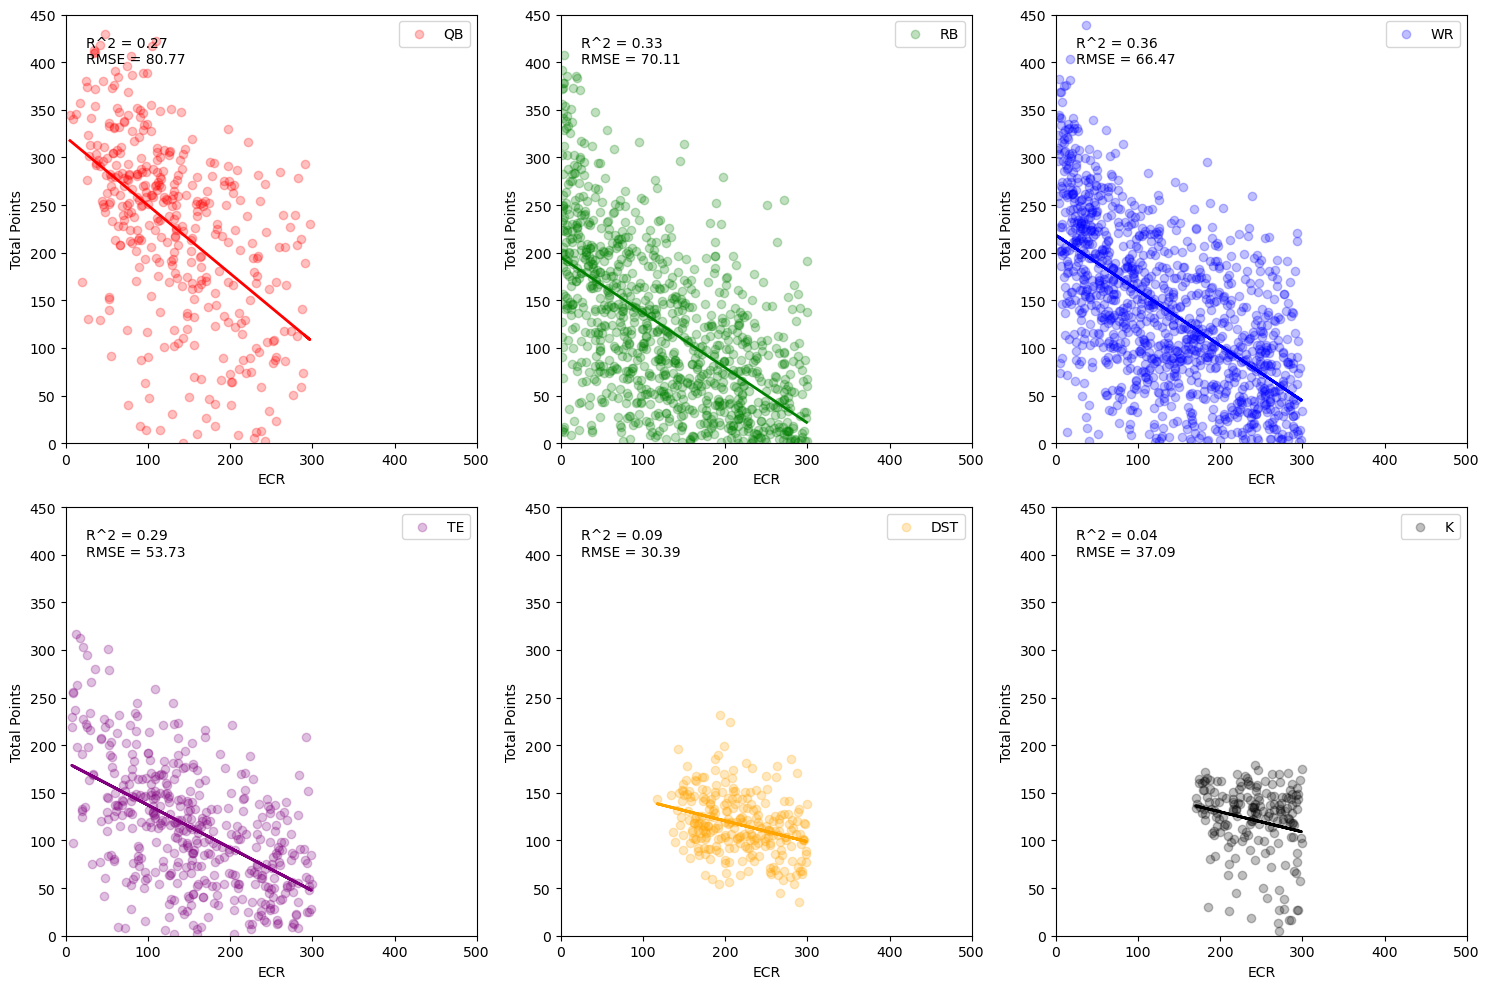

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

def analyze_position(df, pos, ax, color):
    data = df[df['POS'] == pos]
    data = data[data['FPTS'] > 0]
    data = data[data['RK'] > 0]
    data = data[data['RK'] < 300]

    X = data['RK'].values.reshape(-1,1)
    y = data['FPTS'].values.reshape(-1,1)

    model = LinearRegression()
    model.fit(X, y)
    pred = model.predict(X)

    r2 = model.score(X, y)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y, pred))

    ax.scatter(X, y, color=color, label=pos, alpha=0.25)
    ax.plot(X, pred, color=color, linewidth=2)
    ax.text(0.05, 0.95, f'R^2 = {r2:.2f}\nRMSE = {rmse:.2f}', transform=ax.transAxes, verticalalignment='top')
    ax.set_ylabel("Total Points")
    ax.set_xlabel("ECR")

positions = ['QB', 'RB', 'WR', 'TE', 'DST', 'K']
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for pos, color, ax in zip(positions, colors, axs):
    analyze_position(df, pos, ax, color)
    ax.legend()
    ax.set_xlim(0, 500)
    ax.set_ylim(0, 450)

plt.tight_layout()
plt.show()

# Simulation

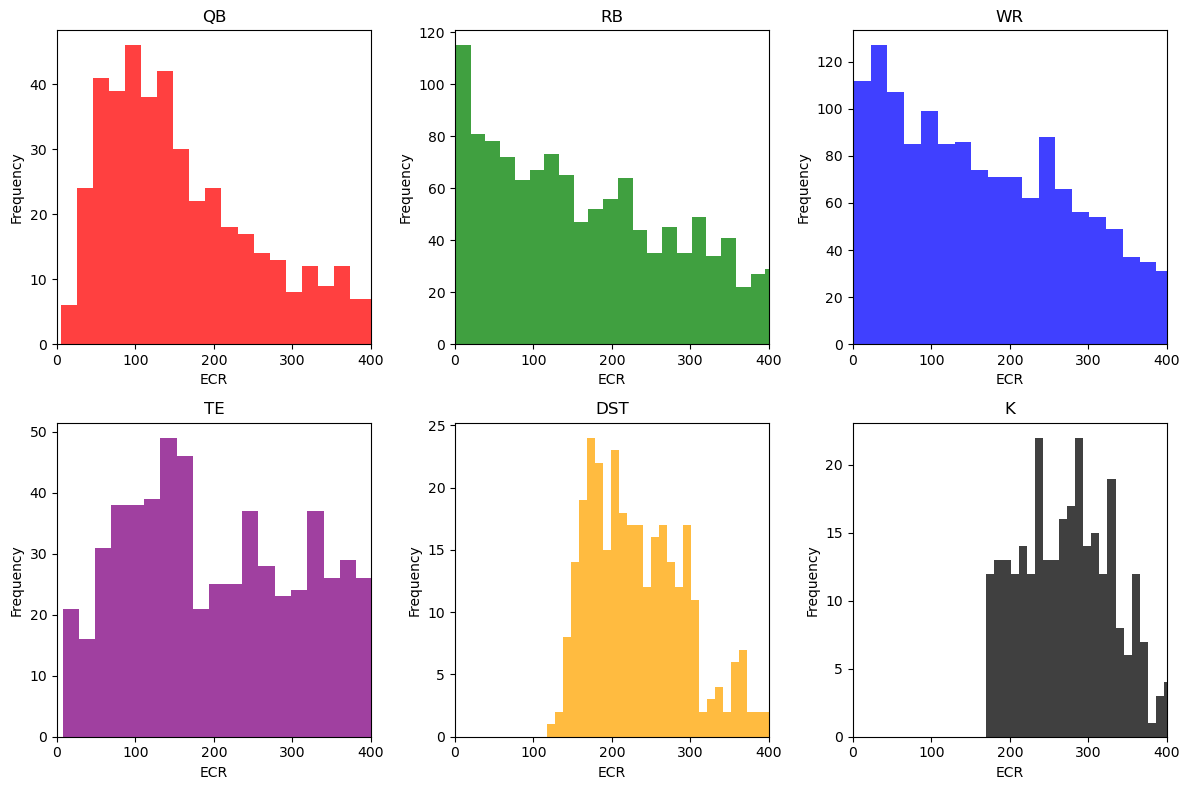

In [17]:
# Histograms of RK by position
def plot_histogram(pos, subplot_num, color):
    data = df[df['POS'] == pos]
    if data.empty:
        print(f"No data for position {pos}")
        return
    plt.subplot(2, 3, subplot_num)
    plt.hist(data['RK'], bins=30, color=color, alpha=0.75)
    plt.title(pos)
    plt.ylabel("Frequency")
    plt.xlabel("ECR")
    plt.xlim(0, 400)

plt.figure(figsize=(12,8))

positions = ['QB', 'RB', 'WR', 'TE', 'DST', 'K']
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']

for i, (pos, color) in enumerate(zip(positions, colors), 1):
    plot_histogram(pos, i, color)

plt.tight_layout()
plt.show()

In [18]:
# Linear regression
from sklearn.linear_model import LinearRegression
def regression_eq(data):
    data = data[data['FPTS'] > 0]
    data = data[data['RK'] > 0]
    data = data[data['RK'] < 300]
    X = data['RK'].values.reshape(-1,1)
    y = data['FPTS'].values.reshape(-1,1)
    model = LinearRegression()
    model.fit(X, y)
    return model

qb_model = regression_eq(df[df['POS'] == 'QB'])
rb_model = regression_eq(df[df['POS'] == 'RB'])
wr_model = regression_eq(df[df['POS'] == 'WR'])
te_model = regression_eq(df[df['POS'] == 'TE'])
dst_model = regression_eq(df[df['POS'] == 'DST'])
k_model = regression_eq(df[df['POS'] == 'K'])

In [19]:
# Define a function to draw selections for a team
def calculate_draft_picks(num_teams, first_selection, num_rounds):
    selections = []
    for round in range(1, num_rounds + 1):
        if round % 2 != 0:  # Odd rounds
            pick = (round - 1) * num_teams + first_selection
        else:  # Even rounds
            pick = round * num_teams - (first_selection - 1)
        selections.append(pick)
    return selections

# Example usage:
num_teams = 12
first_selection = 2
num_rounds = 20
print(calculate_draft_picks(num_teams, first_selection, num_rounds))

[2, 23, 26, 47, 50, 71, 74, 95, 98, 119, 122, 143, 146, 167, 170, 191, 194, 215, 218, 239]


In [20]:
# Simulate a team
import random
import pandas as pd

def ranks(df):
    positionals = {"QB":2,"RB":5,"WR":5,"TE":2,"DST":1,"K":1}
    ranks = pd.DataFrame()
    POS = [k for k, v in positionals.items() for i in range(v)]
    num_teams = 12
    first_selection = random.randint(1, num_teams) # Randomize first selection
    num_rounds = sum(positionals.values()) # Total players from dictionary
    selections = calculate_draft_picks(num_teams, first_selection, num_rounds)
    for pos, num in positionals.items():
        for i in range(num):
            rk = random.sample(selections, 1)[0]
            selections.remove(rk)
            new_row = pd.DataFrame({'POS':pos, 'RK':rk}, index=[0])
            ranks = pd.concat([ranks, new_row], ignore_index=True)
    ranks = ranks.groupby('POS').apply(lambda x: x.sort_values('RK')).reset_index(drop=True)
    ranks['POS'] = pd.Categorical(ranks['POS'], categories=['QB', 'RB', 'WR', 'TE', 'DST', 'K'], ordered=True)
    ranks = ranks.sort_values('POS')
    ranks['POS'] = ranks['POS'].astype(str) + ranks.groupby('POS').cumcount().add(1).astype(str)
    return ranks

ranks(df)

POS   RK
2    QB1   35
3    QB2  182
4    RB1   59
5    RB2   62
6    RB3   86
7    RB4  131
8    RB5  134
11   WR1   83
12   WR2  110
13   WR3  155
14   WR4  158
15   WR5  179
9    TE1   14
10   TE2   38
0   DST1  107
1     K1   11

In [22]:
# Calculate team total points
import random

def error(rmse):
    return random.uniform(-rmse, rmse)

def team_fpts(team):
    fpts = 0
    for i in range(len(team)):
        pos = team.iloc[i]['POS']
        rk = team.iloc[i]['RK']
        if pos == 'QB1':
            fpts += 1.00 * (qb_model.predict((rk).reshape(-1,1)))
        elif pos == 'QB2':
            fpts += 1.00 * (qb_model.predict((rk).reshape(-1,1)))
        elif pos == 'RB1':
            fpts += 1.00 * (rb_model.predict((rk).reshape(-1,1)))
        elif pos == 'RB2':
            fpts += 1.00 * (rb_model.predict((rk).reshape(-1,1)))
        elif pos == 'RB3':
            fpts += 1.00 * (rb_model.predict((rk).reshape(-1,1)))
        elif pos == 'RB4':
            fpts += 1.00 * (rb_model.predict((rk).reshape(-1,1)))
        elif pos == 'RB5':
            fpts += 1.00 * (rb_model.predict((rk).reshape(-1,1)))
        elif pos == 'WR1':
            fpts += 1.00 * (wr_model.predict((rk).reshape(-1,1)))
        elif pos == 'WR2':
            fpts += 1.00 * (wr_model.predict((rk).reshape(-1,1)))
        elif pos == 'WR3':
            fpts += 1.00 * (wr_model.predict((rk).reshape(-1,1)))
        elif pos == 'WR4':
            fpts += 1.00 * (wr_model.predict((rk).reshape(-1,1)))
        elif pos == 'WR5':
            fpts += 1.00 * (wr_model.predict((rk).reshape(-1,1)))
        elif pos == 'TE1':
            fpts += 1.00 * (te_model.predict((rk).reshape(-1,1)))
        elif pos == 'TE2':
            fpts += 1.00 * (te_model.predict((rk).reshape(-1,1)))
        elif pos == 'DST1':
            fpts += 1.00 * (dst_model.predict((rk).reshape(-1,1)))
        elif pos == 'K1':
            fpts += 1.00 * (k_model.predict((rk).reshape(-1,1)))
    return round(float(fpts),2)

# Generate a team
team_fpts(ranks(df))

2620.9

In [23]:
# Simulate 1000 teams and store total points and average ranks for each position
teams = []
for i in range(30000):
    r = ranks(df)
    teams.append([team_fpts(r), 
                  r[r['POS']=='QB1']['RK'].values[0], r[r['POS']=='QB2']['RK'].values[0], 
                  r[r['POS']=='RB1']['RK'].values[0],
                  r[r['POS']=='RB2']['RK'].values[0],
                  r[r['POS']=='RB3']['RK'].values[0],
                  r[r['POS']=='RB4']['RK'].values[0],
                  r[r['POS']=='RB5']['RK'].values[0],
                  r[r['POS']=='WR1']['RK'].values[0],
                  r[r['POS']=='WR2']['RK'].values[0],
                  r[r['POS']=='WR3']['RK'].values[0],
                  r[r['POS']=='WR4']['RK'].values[0],
                  r[r['POS']=='WR5']['RK'].values[0],
                  r[r['POS']=='TE1']['RK'].values[0], r[r['POS']=='TE2']['RK'].values[0], 
                  r[r['POS']=='DST1']['RK'].values[0], r[r['POS']=='K1']['RK'].values[0]])
teams = pd.DataFrame(teams, columns=['FPTS', 'QB1', 'QB2', 
                                    'RB1', 'RB2', 'RB3', 'RB4', 'RB5', 
                                    'WR1', 'WR2', 'WR3', 'WR4', 'WR5', 
                                    'TE1', 'TE2', 'DST1', 'K1'])

In [39]:
teams.head()

FPTS  QB1  QB2  RB1  RB2  RB3  RB4  RB5  WR1  WR2  WR3  WR4  WR5  TE1  \
0  1607.96   60  108   13   36   37  157  181   12   84   85  109  180   61   
1  1734.46   34  106   15   58  135  154  178   10   39   82  111  183   63   
2  1723.84    8   80   17   65   89  104  152   32   56  113  137  185   41   
3  1681.69   16  160    9   81  105  153  184   40   57   88  112  177   33   
4  1548.11   28   45   21   69   76  165  189   93  124  141  148  172    4   

   TE2  DST1   K1  
0  133   132  156  
1  159   130   87  
2  161   176  128  
3  136    64  129  
4  100    52  117

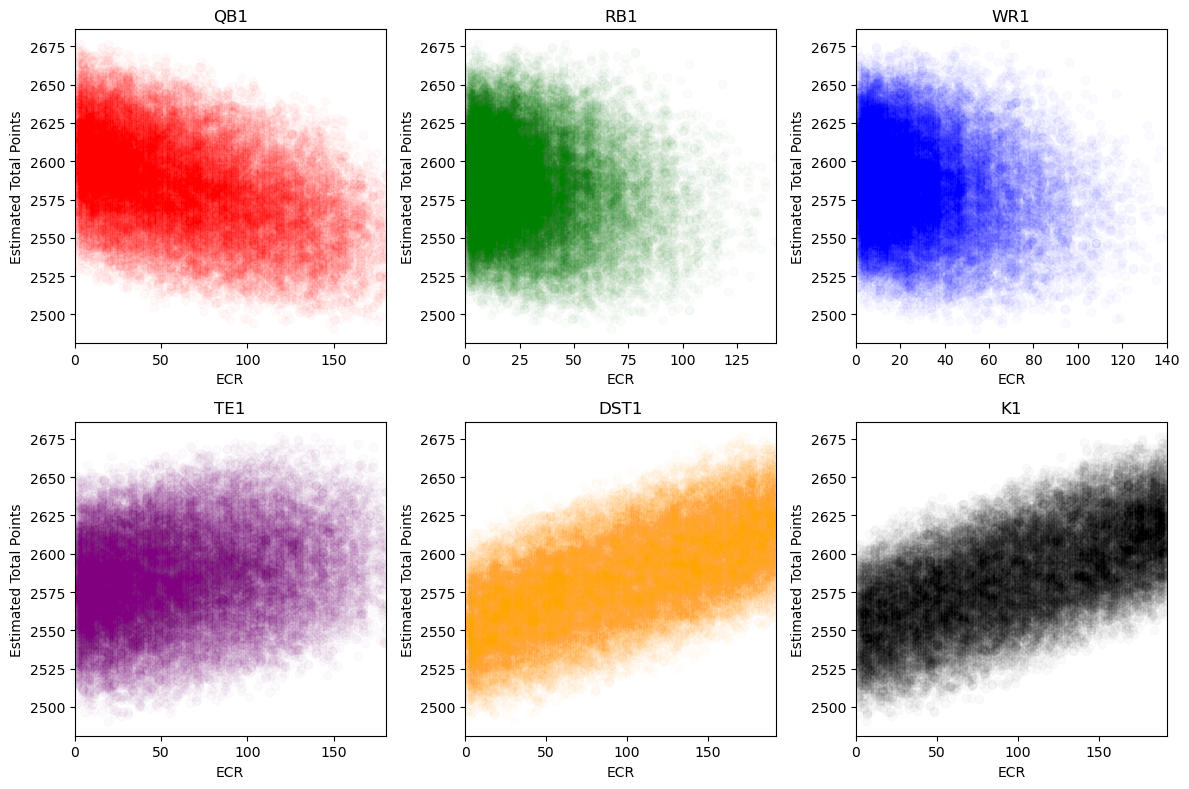

In [24]:
# Scatterplots of average ranks vs total points
def plot_scatter(teams, positions, colors):
    plt.figure(figsize=(12,8))
    for i, (pos, color) in enumerate(zip(positions, colors), 1):
        plt.subplot(2, 3, i)
        plt.scatter(teams[pos], teams['FPTS'], alpha=0.02, color=color)
        plt.xlim(0, max(teams[pos]))
        plt.title(pos)
        plt.ylabel("Estimated Total Points")
        plt.xlabel("ECR")
        plt.tight_layout()

positions = ['QB1', 'RB1', 'WR1', 'TE1', 'DST1', 'K1']
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']
plot_scatter(teams, positions, colors)

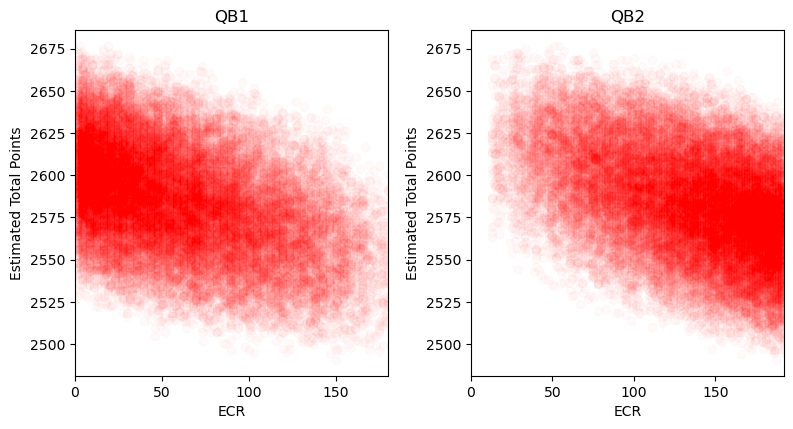

In [25]:
# Scatterplots of average ranks vs total points
def plot_scatter(teams, positions, colors):
    plt.figure(figsize=(12,8))
    for i, (pos, color) in enumerate(zip(positions, colors), 1):
        plt.subplot(2, 3, i)
        plt.scatter(teams[pos], teams['FPTS'], alpha=0.02, color=color)
        plt.xlim(0, max(teams[pos]))
        plt.title(pos)
        plt.ylabel("Estimated Total Points")
        plt.xlabel("ECR")
        plt.tight_layout()

colors=['red', 'red']
positions = ['QB1', 'QB2']
plot_scatter(teams, positions, colors)

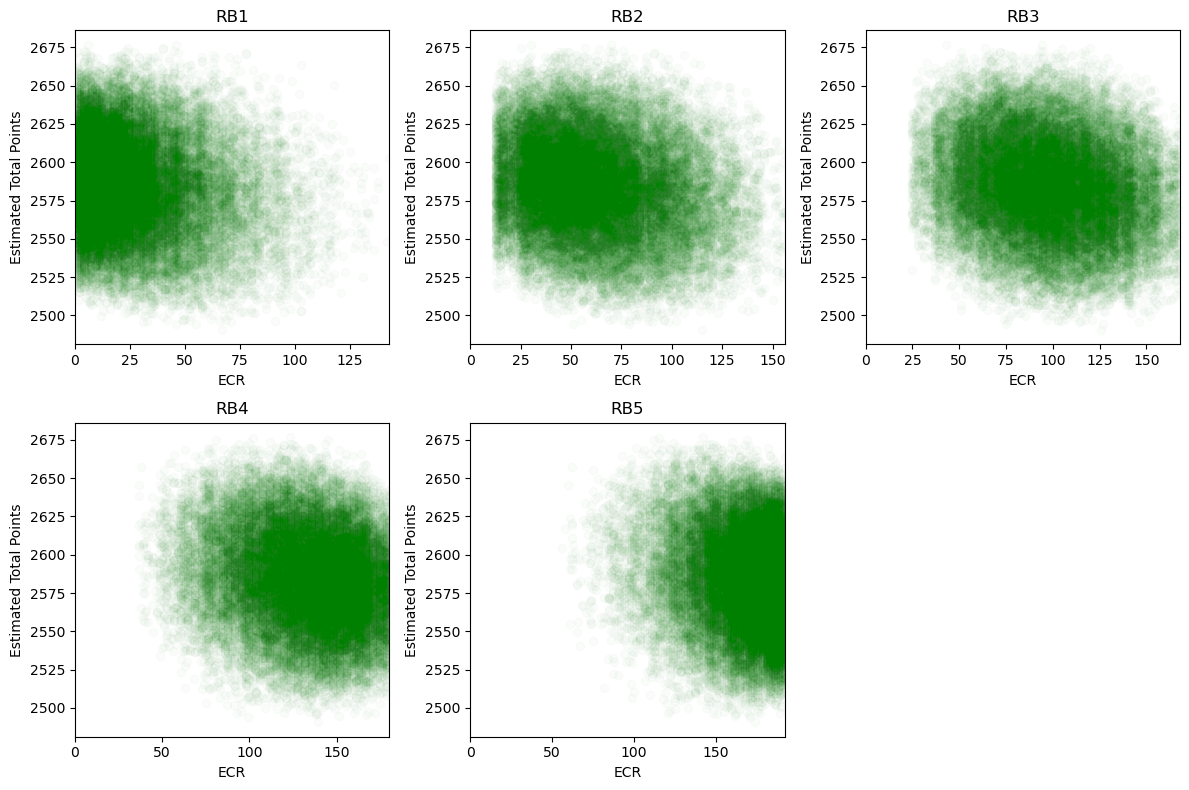

In [26]:
# Scatterplots of average ranks vs total points
colors = ['green', 'green', 'green', 'green', 'green']
positions = ['RB1', 'RB2', 'RB3', 'RB4', 'RB5']
plot_scatter(teams, positions, colors)

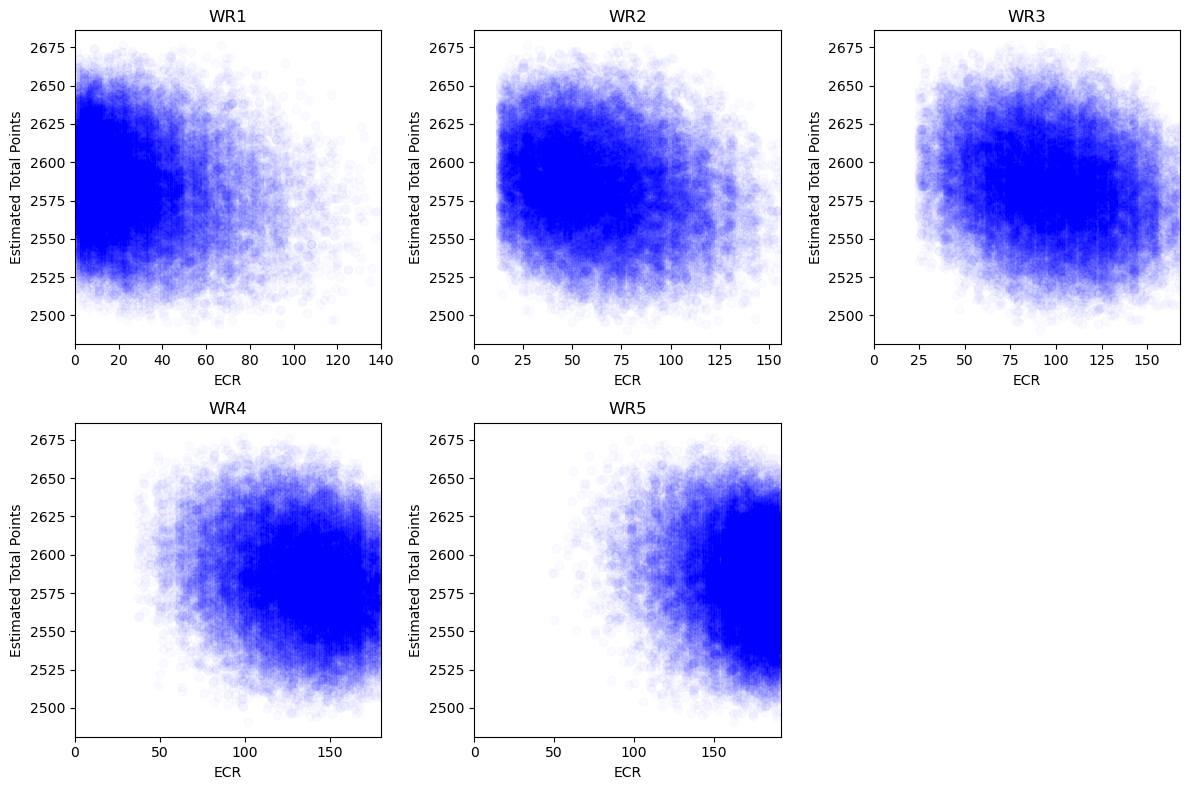

In [27]:
# Scatterplots of average ranks vs total points
colors = ['blue', 'blue', 'blue', 'blue', 'blue']
positions = ['WR1', 'WR2', 'WR3', 'WR4', 'WR5']
plot_scatter(teams, positions, colors)

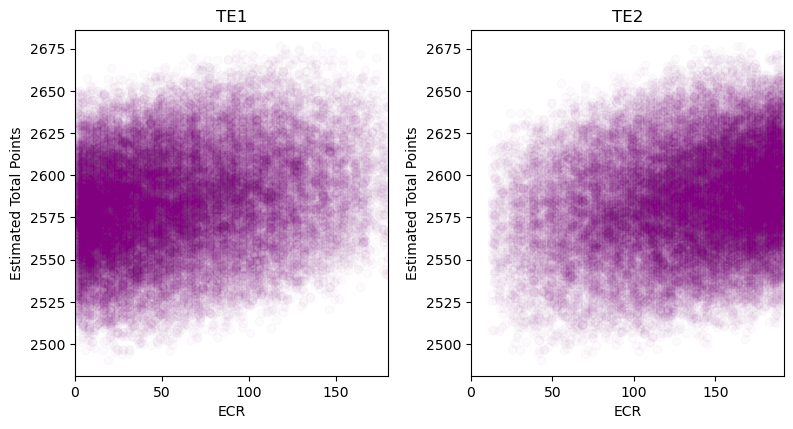

In [28]:
# Scatterplots of average ranks vs total points
colors = ['purple', 'purple']
positions = ['TE1', 'TE2']
plot_scatter(teams, positions, colors)

In [29]:
# Correlation of fpts and other variables
teams.corr()['FPTS']

FPTS    1.000000
QB1    -0.423738
QB2    -0.425688
RB1    -0.137233
RB2    -0.174975
RB3    -0.177454
RB4    -0.169580
RB5    -0.138682
WR1    -0.158247
WR2    -0.192758
WR3    -0.203542
WR4    -0.190180
WR5    -0.155138
TE1     0.206943
TE2     0.200426
DST1    0.594573
K1      0.603872
Name: FPTS, dtype: float64

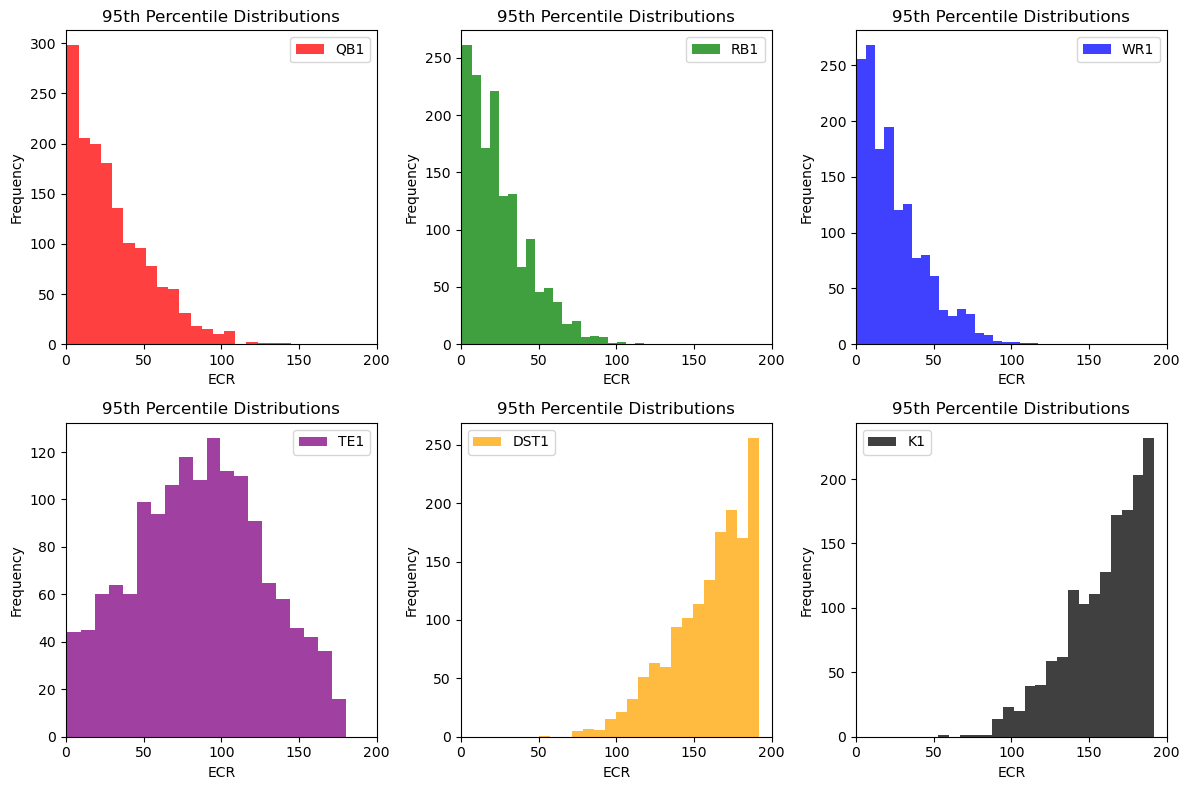

In [30]:
# 90 percentile of fpts
quantile = teams['FPTS'].quantile(0.95)

# Filter teams with fpts greater than 90 percentile
top_teams = teams[teams['FPTS'] >= quantile]

# Histogram of positions in top teams
positions = ['QB1', 'RB1', 'WR1', 'TE1', 'DST1', 'K1']
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']

fig, axs = plt.subplots(2, 3, figsize=(12,8))

for ax, pos, color in zip(axs.flatten(), positions, colors):
    ax.hist(top_teams[pos], bins=20, color=color, alpha=0.75, label=pos)
    ax.set_title("95th Percentile Distributions")
    ax.legend()
    ax.set_ylabel("Frequency")
    ax.set_xlabel("ECR")
    ax.set_xlim(0, 200)

plt.tight_layout()

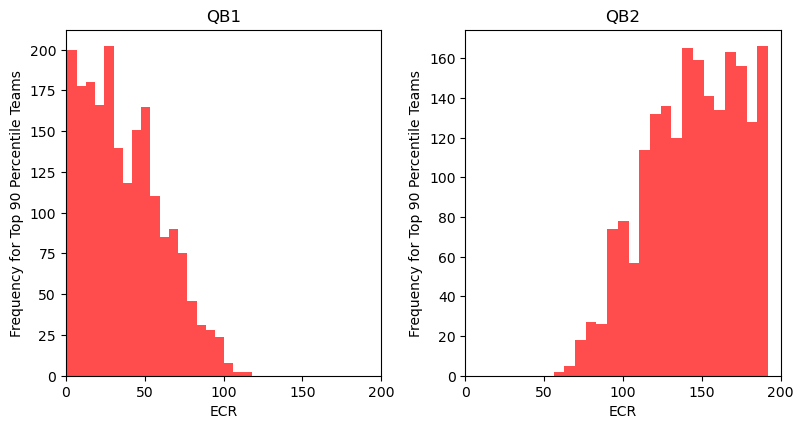

In [89]:
# define a function to plot histograms of positions
def plot_histogram(teams, positions, colors):
    plt.figure(figsize=(12,8))
    for i, (pos, color) in enumerate(zip(positions, colors), 1):
        plt.subplot(2, 3, i)
        plt.hist(teams[pos], color=color, bins=20, alpha=0.7)
        plt.title(pos)
        plt.ylabel("Frequency for Top 90 Percentile Teams")
        plt.xlabel("ECR")
        plt.xlim(0, 200)
    plt.tight_layout()
    
colors = ['red', 'red']
positions = ['QB1', 'QB2']
plot_histogram(top_teams, positions, colors)

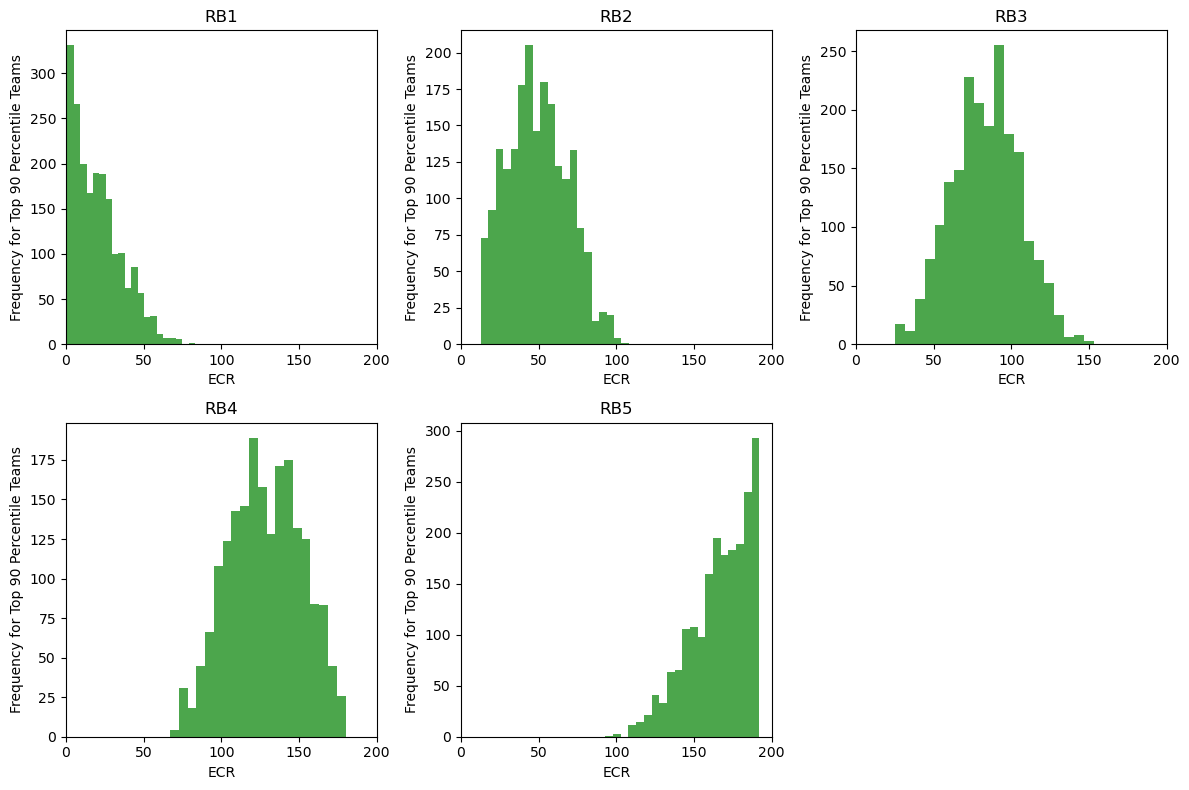

In [90]:
colors = ["green", "green", "green", "green", "green"]
positions = ['RB1', 'RB2', 'RB3', 'RB4', 'RB5']
plot_histogram(top_teams, positions, colors)

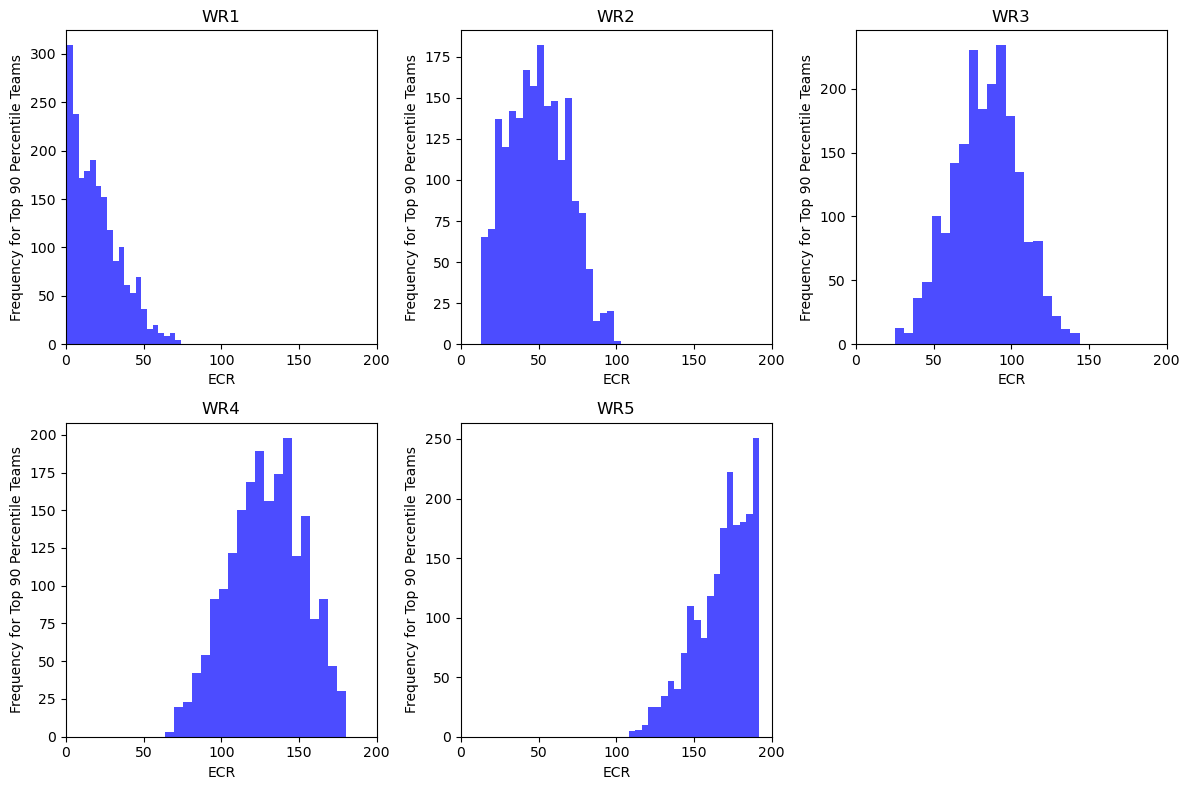

In [91]:
colors = ['blue', 'blue', 'blue', 'blue', 'blue']
positions = ['WR1', 'WR2', 'WR3', 'WR4', 'WR5']
plot_histogram(top_teams, positions, colors)

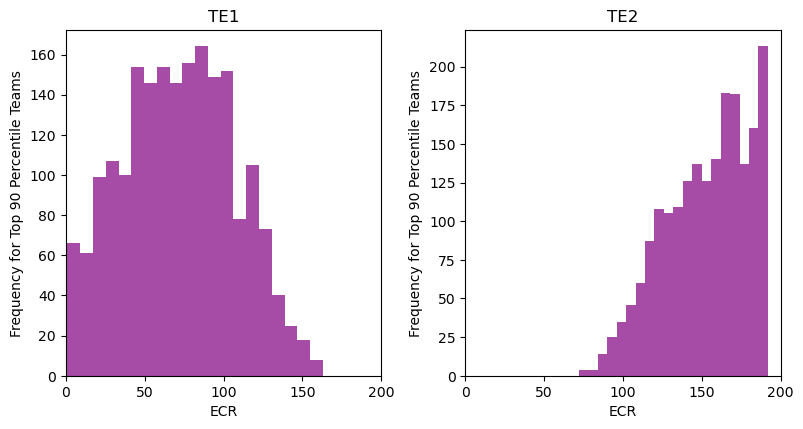

In [92]:
colors = ['purple', 'purple']
positions = ['TE1', 'TE2']
plot_histogram(top_teams, positions, colors)